In [4]:
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
from wremnants import plot_tools, theory_tools
from utilities import boostHistHelpers as hh,input_tools
import uproot
import pickle, lz4.frame
import glob

Welcome to JupyROOT 6.28/02


In [5]:
%load_ext autoreload
%autoreload 2

In [197]:
from narf import ioutils
ioutils

<module 'narf.ioutils' from '/home/k/kelong/work/WRemnants/narf/narf/ioutils.py'>

In [198]:
genfile = "/scratch/kelong/Analysis/w_z_gen_dists.hdf5"
minnlo_wm = input_tools.read_and_scale(genfile, "WminusmunuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)
minnlo_wm_pdf = input_tools.read_and_scale(genfile, "WminusmunuPostVFP", "nominal_gen_pdfMSHT20", calculate_lumi=False, scale=1)
minnlo_wm_pdfas = input_tools.read_and_scale(genfile, "WminusmunuPostVFP", "nominal_gen_pdfMSHT20alphaS002", calculate_lumi=False, scale=1)
minnlo_wp = input_tools.read_and_scale(genfile, "WplusmunuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)
minnlo_z = input_tools.read_and_scale(genfile, "ZmumuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)
minnlo_z_pdf = input_tools.read_and_scale(genfile, "ZmumuPostVFP", "nominal_gen_pdfMSHT20", calculate_lumi=False, scale=1)

In [199]:
scetlib_n3ll_wm = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wm_MSHT20_tnp_combined.pkl", nonsing="")

In [200]:
scetlib_n3ll_z = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20.pkl", nonsing="")
scetlib_n3ll_z_oldnp = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z/inclusive_Z_MSHT20.pkl", nonsing="")
scetlib_n3ll_z_other = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Z_vars/inclusive_Z_MSHT20_N3LL_NP.pkl", nonsing="")

In [201]:
minnlo_z_pt, scetlib_n3ll_z_pt, scetlib_n3ll_z_oldnp_pt, scetlib_n3ll_z_other_pt = hh.rebinHistsToCommon([minnlo_z.project("ptVgen"), scetlib_n3ll_z.project("qT", "vars"), scetlib_n3ll_z_oldnp[{"vars" : 0}].project("qT"), scetlib_n3ll_z_other[{"vars" : 0}].project("qT")], 0)

In [234]:
scetlib_dyturbo_n3ll = input_tools.read_matched_scetlib_dyturbo_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_vars_combined.pkl",
    "/home/k/kelong/TheoryCorrections/SCETlib/Z/msht20nnlo/inclusive_Z_MSHT20_NP0_nnlo_sing_combined.pkl",
    "/home/k/kelong/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/pdfvariations/msht20nnlo/z0/results_z-2d-nnlo-vj-member0-scetlibmatch.txt.txt",
    axes=("Y", "qT"),
    #charge=0,
)

In [6]:
corrf = pickle.load(lz4.frame.open("../wremnants/data/TheoryCorrections/scetlib_dyturboCorrZ.pkl.lz4"))

In [7]:
corrf["Z"]["scetlib_dyturbo_minnlo_ratio"]

Hist(
  Variable([60, 120], name='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 5], underflow=False, name='absY'),
  Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.]), name='qT'),
  Regular(1, 0, 1, underflow=False, overflow=False, name='charge'),
  StrCategory(['pdf0', 'kappaFO0.5-kappaf2.', 'kappaFO2.-kapp

NameError: name 'os' is not defined

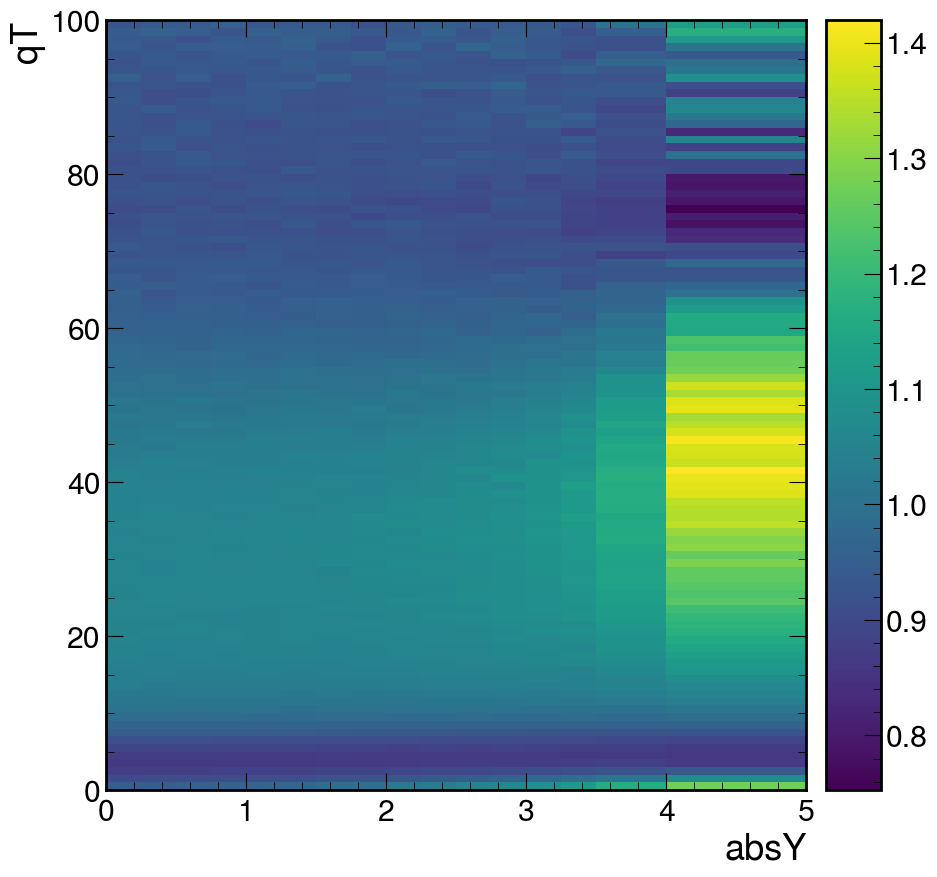

In [8]:
corrf["Z"]["scetlib_dyturbo_minnlo_ratio"][{"vars" : 0, "charge" : 0, "massVgen" : 0}].plot()
out = "/home/k/kelong/www/WMassAnalysis/TheoryComparisons/Z"
plot_tools.make_plot_dir(out, "MSHT20")
out = os.path.join(out, "MSHT20")
plot_tools.save_pdf_and_png(out, "corr2D_ScetlibDYTurboCorr_MiNNLO")
plot_tools.write_index_and_log(out, "corr2D_ScetlibDYTurboCorr_MiNNLO")

In [400]:
corrf["Z"]["scetlib_dyturbo_hist"]

Hist(
  Variable([60, 120], name='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 5], underflow=False, name='absY'),
  Variable(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.]), name='qT'),
  Regular(1, 0, 1, underflow=False, overflow=False, name='charge'),
  StrCategory(['pdf0', 'kappaFO0.5-kappaf2.', 'kappaFO2.-kapp

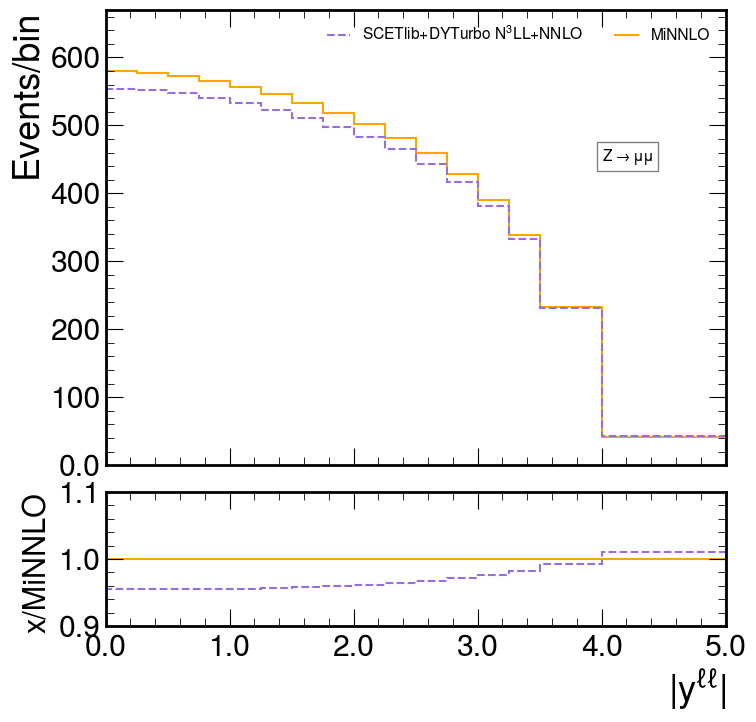

In [414]:
fig = plot_tools.makePlotWithRatioToRef(
            [corrf["Z"]["minnlo_ref_hist"].project("absy"),
                corrf["Z"]["scetlib_dyturbo_hist"][{"vars" : 0}].project("absY"),
            ],
            ["MiNNLO", 
             "SCETlib+DYTurbo N$^{3}$LL+NNLO", 
            ],
            colors=["orange", "mediumpurple"], 
            linestyles=["solid", "dashed", ],
            xlabel=r"$|y^{\ell\ell}|$", 
            ylabel="Events/bin",
            rlabel="x/MiNNLO",
            legtext_size=16,
            rrange=[0.9, 1.1],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True, extra_text=r"$Z\rightarrow\mu\mu$")

out = "/home/k/kelong/www/WMassAnalysis/TheoryComparisons/Z"
plot_tools.make_plot_dir(out, "MSHT20")
out = os.path.join(out, "MSHT20")
plot_tools.save_pdf_and_png(out, "absy_ScetlibDYTurboCorr_MiNNLO")
plot_tools.write_index_and_log(out, "absy_ScetlibDYTurboCorr_MiNNLO")

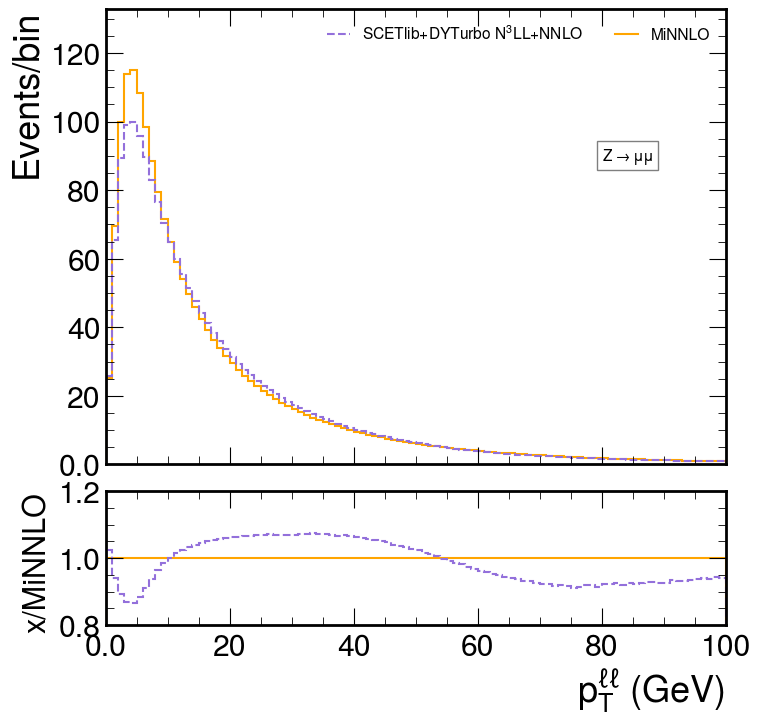

In [415]:
fig = plot_tools.makePlotWithRatioToRef(
            [corrf["Z"]["minnlo_ref_hist"].project("ptVgen"),
                corrf["Z"]["scetlib_dyturbo_hist"][{"vars" : 0}].project("qT"),
            ],
            ["MiNNLO", 
             "SCETlib+DYTurbo N$^{3}$LL+NNLO", 
            ],
            colors=["orange", "mediumpurple"], 
            linestyles=["solid", "dashed", ],
            xlabel=r"p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/MiNNLO",
            legtext_size=16,
            rrange=[0.8, 1.2],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True, extra_text=r"$Z\rightarrow\mu\mu$")

out = "/home/k/kelong/www/WMassAnalysis/TheoryComparisons/Z"
plot_tools.make_plot_dir(out, "MSHT20")
out = os.path.join(out, "MSHT20")
plot_tools.save_pdf_and_png(out, "ptZ_ScetlibDYTurboCorr_MiNNLO")
plot_tools.write_index_and_log(out, "ptZ_ScetlibDYTurboCorr_MiNNLO")

In [289]:
scetlib_dyturbo_n3ll[{"Y" : s[-5.j:5.j+1:hist.sum], "vars" : 0}]

Hist(Regular(100, 0, 100, name='qT'), storage=Weight()) # Sum: WeightedSum(value=1852.09, variance=0.000117063)

In [293]:
scetlib_dyturbo_n3ll[{"vars" : 0}].sum().value/minnlo_z_y.sum(flow=False).value

0.943630904693052

In [265]:
minnlo_z[{"ptVgen" : s[0.j:100.j]}].project("y").sum()

WeightedSum(value=1995.44, variance=0.0581941)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fe4521f3640>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

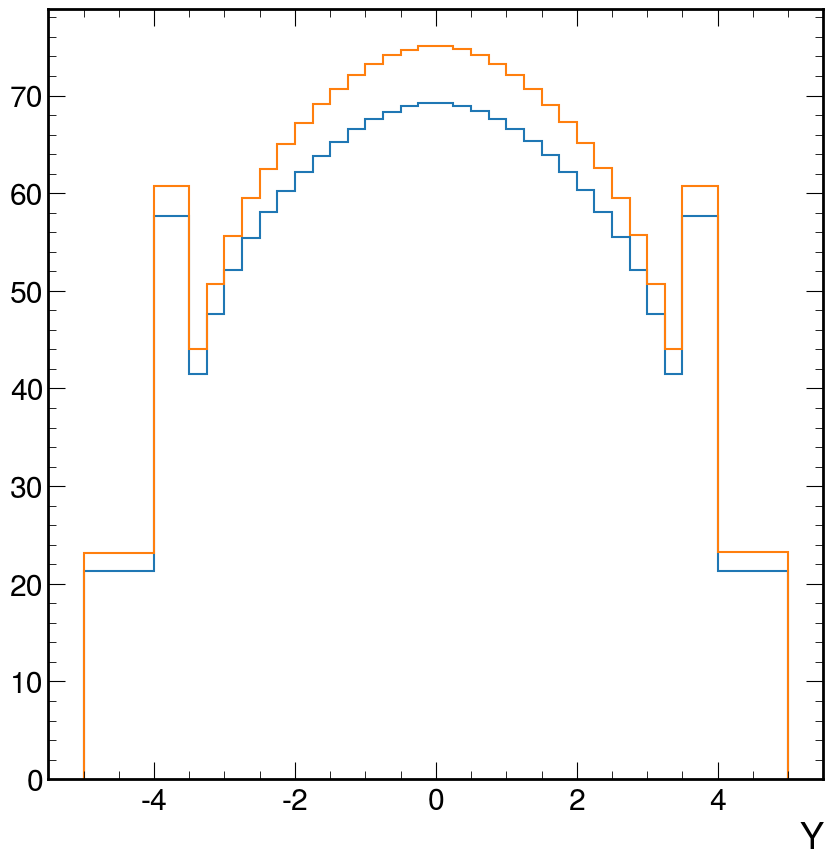

In [217]:
scetlib_dyturbo_n3ll_y.plot()
minnlo_z_y.plot()

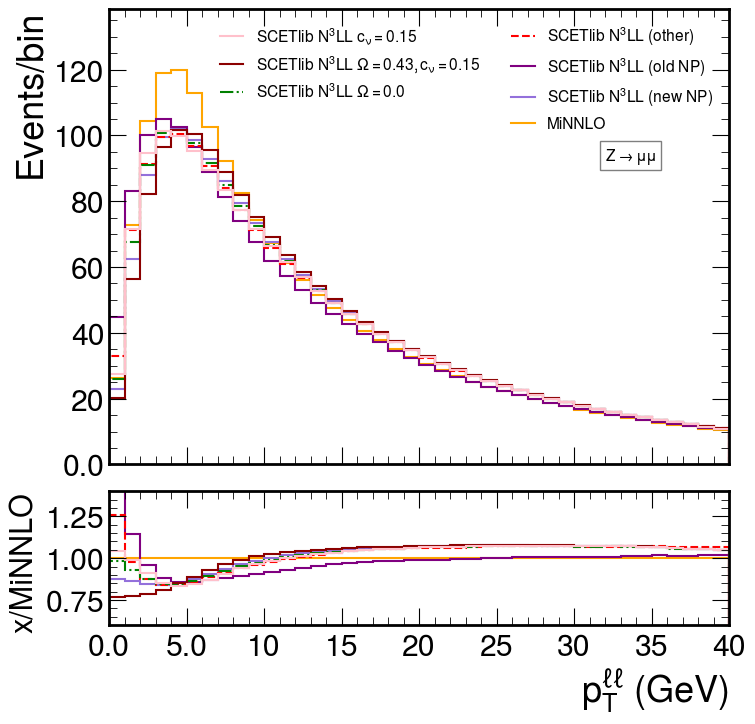

In [8]:
fig = plot_tools.makePlotWithRatioToRef(
            [minnlo_z_pt,
                 scetlib_n3ll_z_pt[{"vars" : "central"}],
                 scetlib_n3ll_z_oldnp_pt,
                 scetlib_n3ll_z_other_pt,
                 scetlib_n3ll_z_pt[{"vars" : "Omega0."}],
                 scetlib_n3ll_z_pt[{"vars" : 'c_nu-0.15-omega_nu0.43'}],
                 scetlib_n3ll_z_pt[{"vars" : 'c_nu0.05'}],
            ],
            ["MiNNLO", "SCETlib N$^{3}$LL (new NP)", "SCETlib N$^{3}$LL (old NP)", 
             "SCETlib N$^{3}$LL (other)", 
             r"SCETlib N$^{3}$LL $\Omega = 0.0$", 
             r"SCETlib N$^{3}$LL $\Omega = 0.43, c_{\nu} = 0.15$",
            r"SCETlib N$^{3}$LL $c_{\nu} = 0.15$"
            ],
            colors=["orange", "mediumpurple", "purple", "red", "green", "darkred", "pink"], 
            linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/MiNNLO",
            legtext_size=16,
            rrange=[0.6, 1.4],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True, extra_text=r"$Z\rightarrow\mu\mu$")

In [9]:
scetlib_new = pickle.load(open("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wm_MSHT20_tnp_combined.pkl", "rb"))

In [10]:
scetlibZ_pdf = pickle.load(open("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_NP0_combined.pkl", "rb"))["hist"]

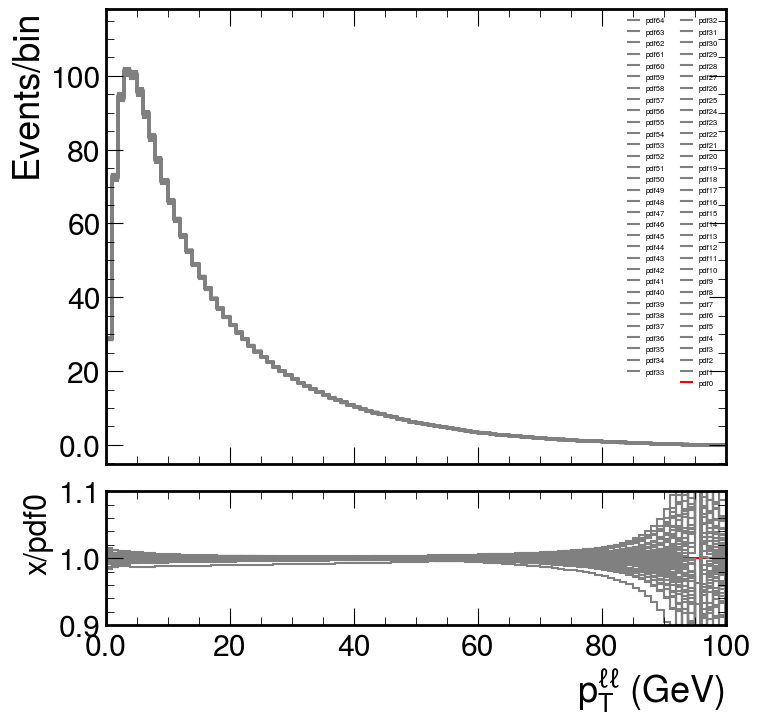

In [13]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                scetlibZ_pdf[{"vars" : x}].project("qT") for x in scetlibZ_pdf.axes["vars"]
            ],
            labels=list(scetlibZ_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(scetlibZ_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.9, 1.1],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)

Text(0.5, 1.0, 'SCETlib')

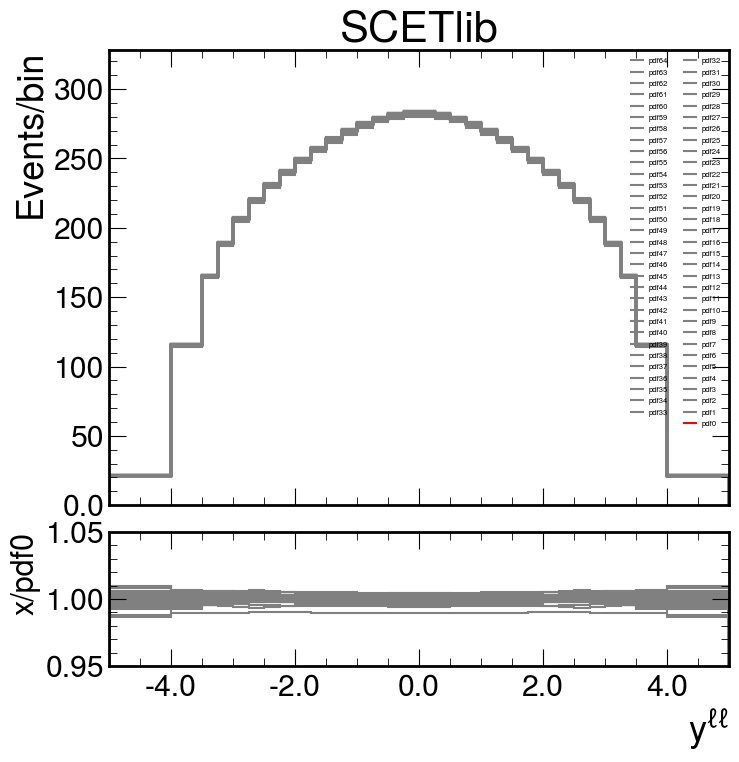

In [14]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                scetlibZ_pdf[{"vars" : x}].project("Y") for x in scetlibZ_pdf.axes["vars"]
            ],
            labels=list(scetlibZ_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(scetlibZ_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$y^{\ell\ell}$", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("SCETlib")

In [16]:
scetlibWm_pdf = pickle.load(open("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wm_MSHT20_NP0_PDFVars_combined.pkl", "rb"))["hist"]

Text(0.5, 1.0, 'SCETlib')

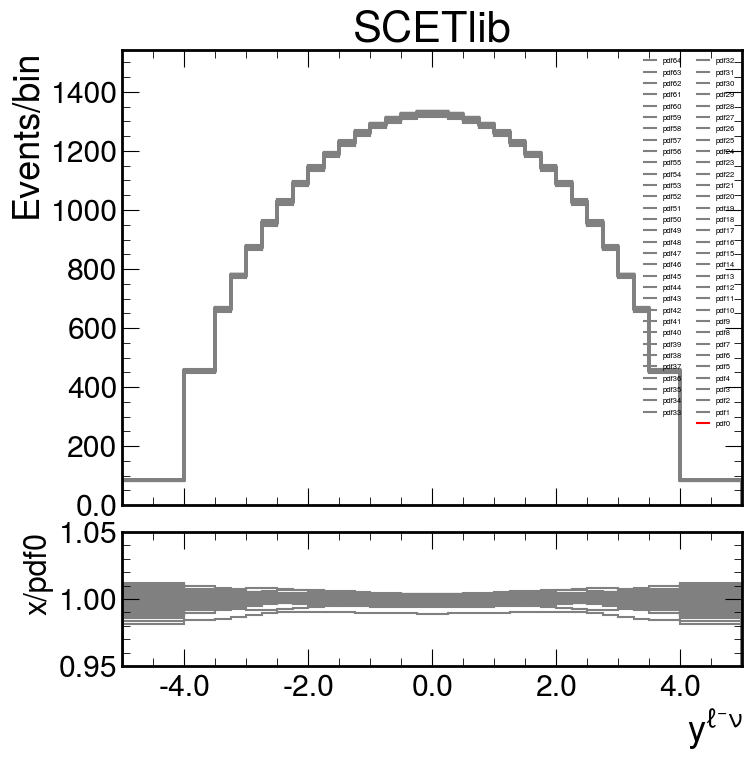

In [18]:
s = hist.tag.Slicer()
fig = plot_tools.makePlotWithRatioToRef(
            [
                scetlibWm_pdf[{"vars" : x}].project("Y") for x in scetlibWm_pdf.axes["vars"]
            ],
            labels=list(scetlibWm_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(scetlibWm_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$y^{\ell^{-}\nu}$", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("SCETlib")

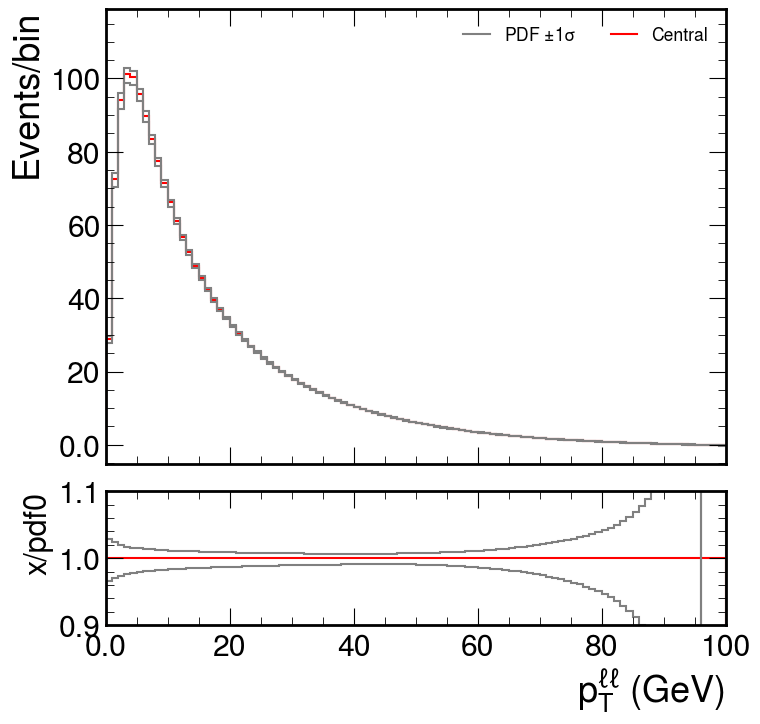

In [52]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                scetlibZ_pdf[{"vars" : "pdf0"}].project("qT"),
                *theory_tools.hessianPdfUnc(scetlibZ_pdf.project("qT", "vars"), "vars", uncType="asymHessian"),
            ],
            labels=["Central", "PDF $\pm 1\sigma$", ""],
            colors=["red"]+["grey"]*2, 
            xlabel=r"$p_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=18,
            rrange=[0.9, 1.1],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)

In [ ]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                scetlibWm_pdf[{"vars" : x}].project("qT") for x in scetlibWm_pdf.axes["vars"]
            ],
            labels=list(scetlibWm_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(scetlibWm_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"p$_{T}^{\ell^{-}\nu}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.9, 1.1],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)

Text(0.5, 1.0, 'MiNNLO')

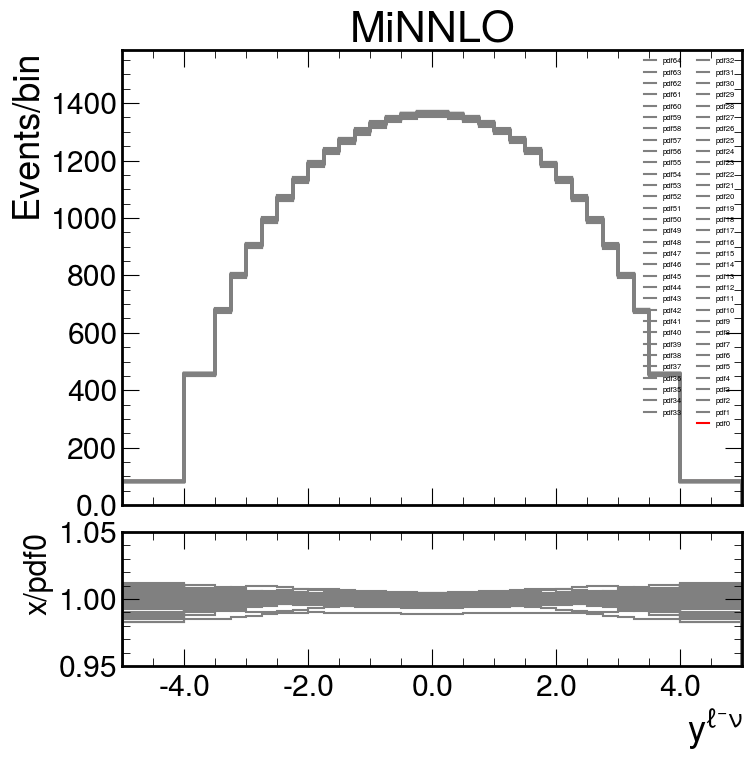

In [22]:
s = hist.tag.Slicer()
minnlo_wm_pdf_rebin = hh.rebinHist(minnlo_wm_pdf, "y", scetlibWm_pdf.axes["Y"].edges)
fig = plot_tools.makePlotWithRatioToRef(
            [
                minnlo_wm_pdf_rebin[{"pdfVar" : x}].project("y") for x in minnlo_wm_pdf.axes["pdfVar"]
            ],
            labels=list(scetlibWm_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(scetlibWm_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$y^{\ell^{-}\nu}$", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("MiNNLO")

Text(0.5, 1.0, 'MiNNLO')

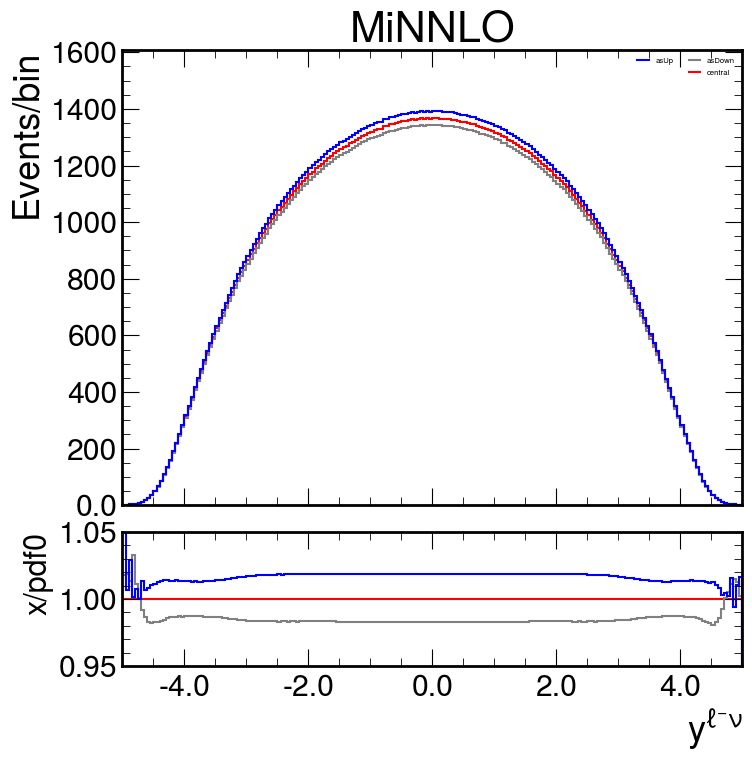

In [23]:

fig = plot_tools.makePlotWithRatioToRef(
            [
                minnlo_wm_pdf[{"pdfVar" : 0}].project("y"),
                minnlo_wm_pdfas[{"alphasVar" : "as0116"}].project("y"),
                minnlo_wm_pdfas[{"alphasVar" : "as0120"}].project("y"),
            ],
            labels=["central", "asDown", "asUp"],
            colors=["red", "grey", "blue"], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$y^{\ell^{-}\nu}$", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("MiNNLO")

In [28]:
dyturboZ_pdf = input_tools.read_dyturbo_pdf_hist("/scratch/shared/TheoryPredictions/DYTurbo/Z/msht20nnlo/pdfvars/results_z-2d-nnlo-vj-member{i}-scetlibmatch.txt",
                    pdf_members=65, axes=("Y", "qT"), charge=0)

Text(0.5, 1.0, 'DYTurbo')

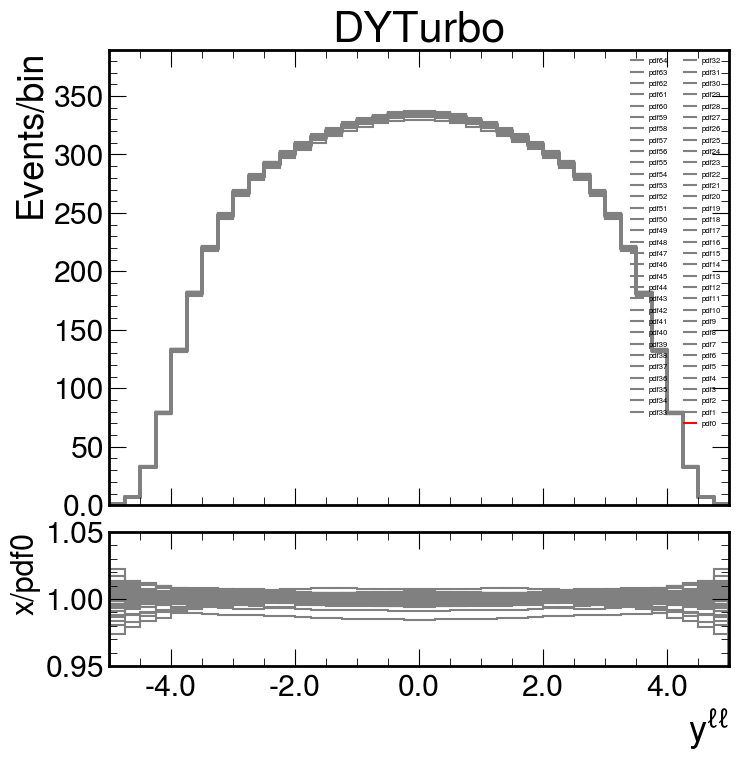

In [29]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                dyturboZ_pdf[{"vars" : x}].project("Y") for x in dyturboZ_pdf.axes["vars"]
            ],
            labels=list(dyturboZ_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(dyturboZ_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$y^{\ell\ell}$", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("DYTurbo")

Text(0.5, 1.0, 'DYTurbo')

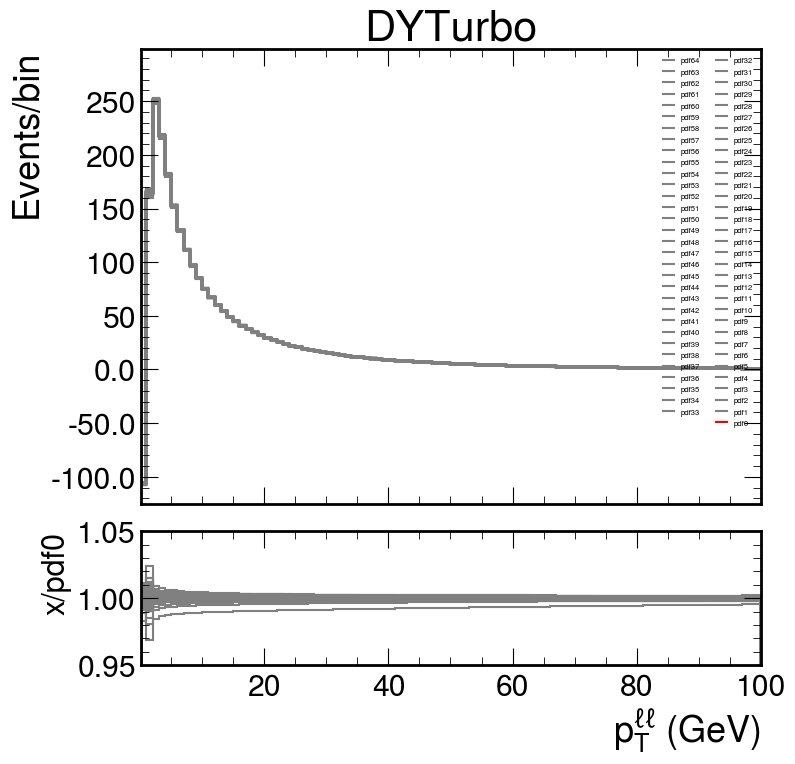

In [30]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                dyturboZ_pdf[{"vars" : x}].project("qT") for x in dyturboZ_pdf.axes["vars"]
            ],
            labels=list(dyturboZ_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(dyturboZ_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$p_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("DYTurbo")

Text(0.5, 1.0, 'DYTurbo')

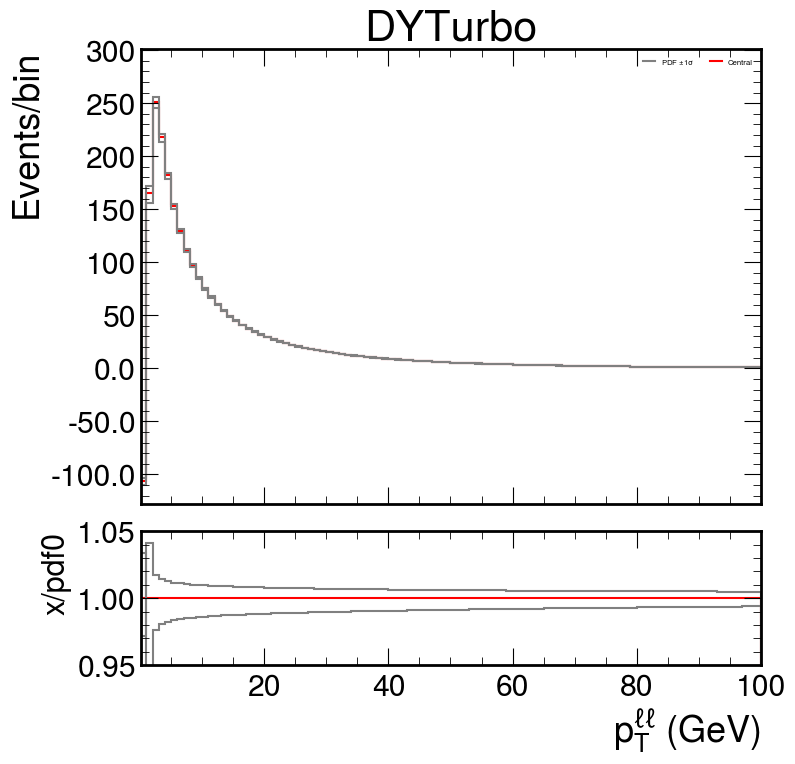

In [40]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                dyturboZ_pdf[{"vars" : "pdf0"}].project("qT"),
                *theory_tools.hessianPdfUnc(dyturboZ_pdf.project("qT", "vars"), "vars", uncType="asymHessian"),
            ],
            labels=["Central", "PDF $\pm 1\sigma$", ""],
            colors=["red"]+["grey"]*2, 
            xlabel=r"$p_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("DYTurbo")

In [ ]:
all("pdf" in x for x in scetlibZ_pdf.axes["vars"])

Text(0.5, 1.0, 'MiNNLO')

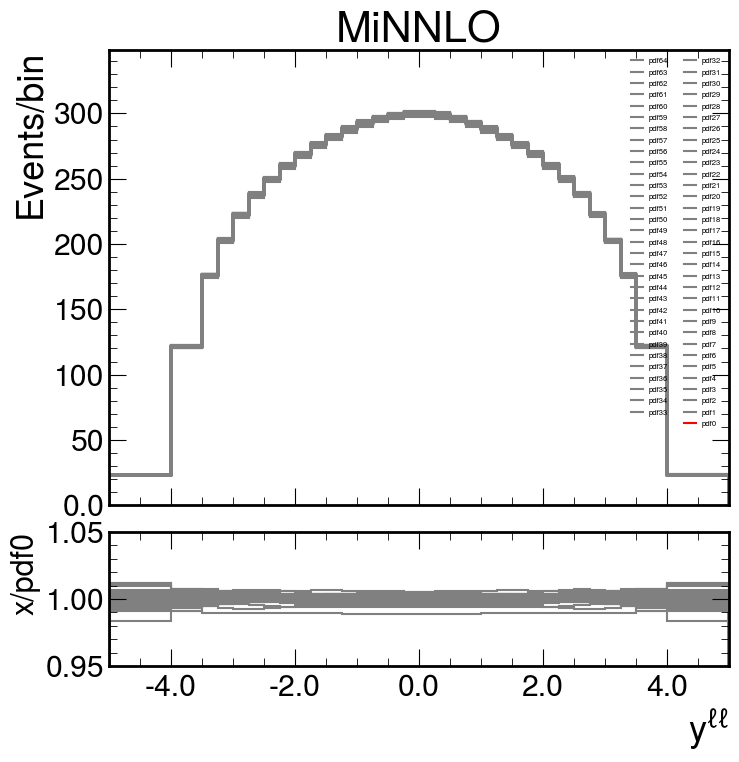

In [41]:
s = hist.tag.Slicer()
minnlo_z_pdf_rebin = hh.rebinHist(minnlo_z_pdf, "y", scetlibZ_pdf.axes["Y"].edges)
fig = plot_tools.makePlotWithRatioToRef(
            [
                minnlo_z_pdf_rebin[{"pdfVar" : x}].project("y") for x in minnlo_wm_pdf.axes["pdfVar"]
            ],
            labels=list(scetlibZ_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(scetlibZ_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$y^{\ell\ell}$", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("MiNNLO")

Text(0.5, 1.0, 'MiNNLO')

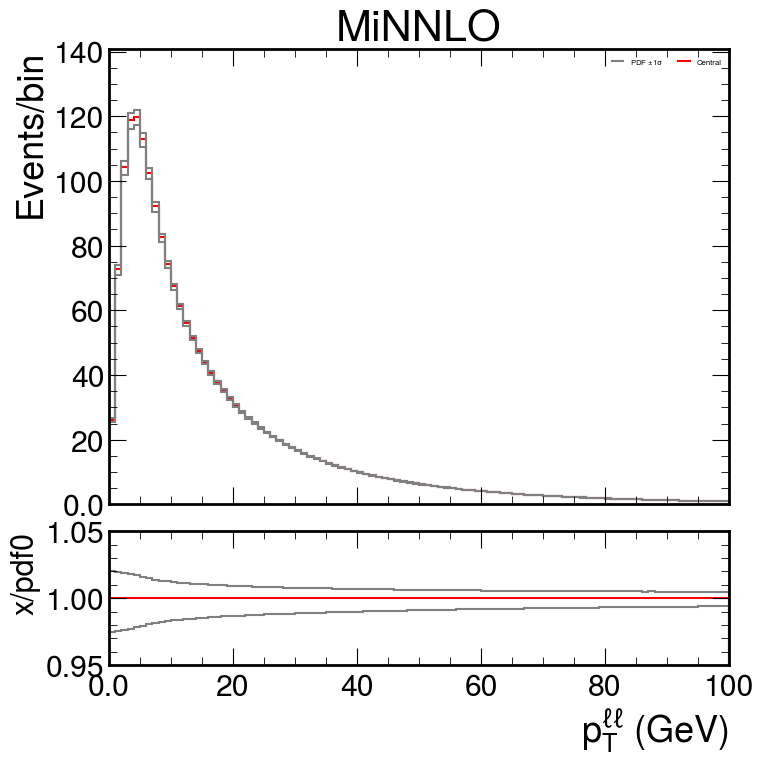

In [64]:
minnlo_z_pdf_rebin = hh.rebinHist(minnlo_z_pdf, "ptVgen", scetlibZ_pdf.axes["qT"].edges)
fig = plot_tools.makePlotWithRatioToRef(
            [
                minnlo_z_pdf_rebin[{"pdfVar" : "pdf0MSHT20"}].project("ptVgen"),
                *theory_tools.hessianPdfUnc(minnlo_z_pdf_rebin.project("ptVgen", "pdfVar"), "pdfVar", uncType="asymHessian"),
            ],
            labels=["Central", "PDF $\pm 1\sigma$", ""],
            colors=["red"]+["grey"]*2, 
            xlabel=r"$p_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("MiNNLO")

In [155]:
dyturbo_scetlib_pdf = input_tools.read_matched_scetlib_dyturbo_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_NP0_combined.pkl",
    "/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_NP0_nnlo_sing_combined.pkl",
    "/scratch/shared/TheoryPredictions/DYTurbo/Z/msht20nnlo/pdfvars/results_z-2d-nnlo-vj-member{i}-scetlibmatch.txt",
    axes=("Y", "qT"),
    charge=0,
)

In [ ]:
dyturbo_scetlib_pdf

Text(0.5, 1.0, 'DYTurbo+SCETlib')

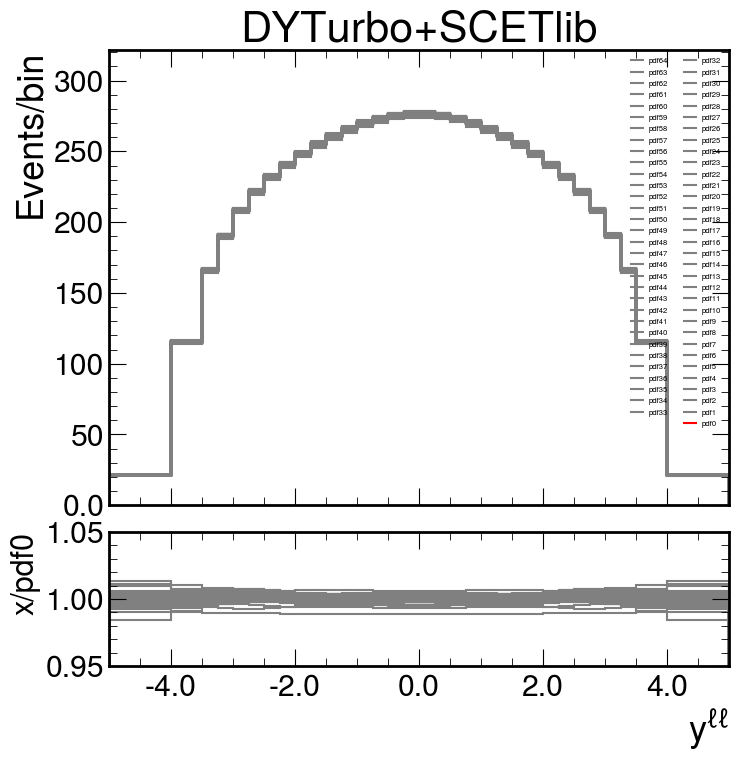

In [158]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                dyturbo_scetlib_pdf[{"vars" : x}].project("Y") for x in dyturbo_scetlib_pdf.axes["vars"]
            ],
            labels=list(dyturbo_scetlib_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(dyturbo_scetlib_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$y^{\ell\ell}$", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("DYTurbo+SCETlib")

In [ ]:
import lz4.frame
res = pickle.load(lz4.frame.open("/home/k/kelong/work/WRemnants/utilities/../wremnants/data//TheoryCorrections/scetlib_dyturboMSHT20UncCorrZ.pkl.lz4"))

In [ ]:
res["Z"]["scetlib_dyturboMSHT20Unc_hist"][{"vars" : 0}].sum()

Text(0.5, 1.0, 'DYTurbo+SCETlib')

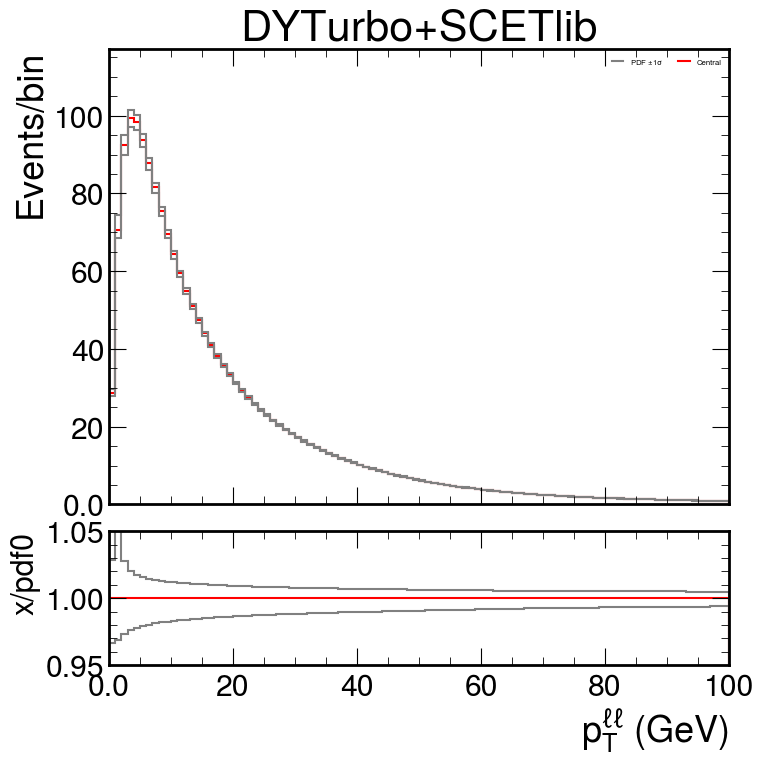

In [162]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                dyturbo_scetlib_pdf[{"vars" : "pdf0"}].project("qT"),
                *theory_tools.hessianPdfUnc(dyturbo_scetlib_pdf.project("qT", "vars"), "vars", uncType="asymHessian"),
            ],
            labels=["Central", "PDF $\pm 1\sigma$", ""],
            colors=["red"]+["grey"]*2, 
            xlabel=r"$p_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("DYTurbo+SCETlib")

Text(0.5, 1.0, 'DYTurbo+SCETlib')

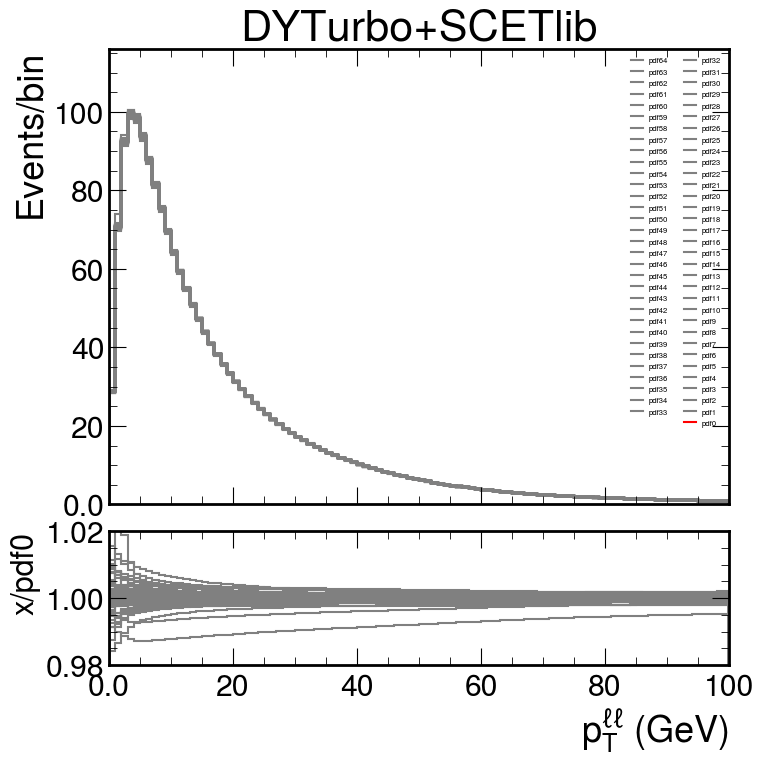

In [167]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                dyturbo_scetlib_pdf[{"vars" : x}].project("qT") for x in dyturbo_scetlib_pdf.axes["vars"]
            ],
            labels=list(dyturbo_scetlib_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(dyturbo_scetlib_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$p_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.98, 1.02],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("DYTurbo+SCETlib")

Text(0.5, 1.0, 'SCETlib')

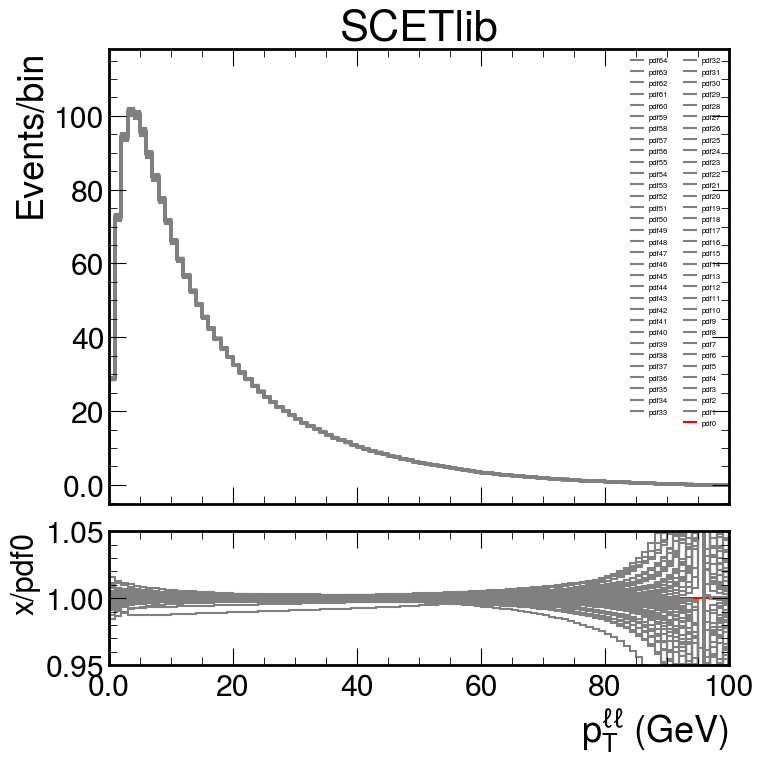

In [160]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                scetlibZ_pdf[{"vars" : x}].project("qT") for x in scetlibZ_pdf.axes["vars"]
            ],
            labels=list(scetlibZ_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(scetlibZ_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$p_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("SCETlib")

Text(0.5, 1.0, 'DYTurbo')

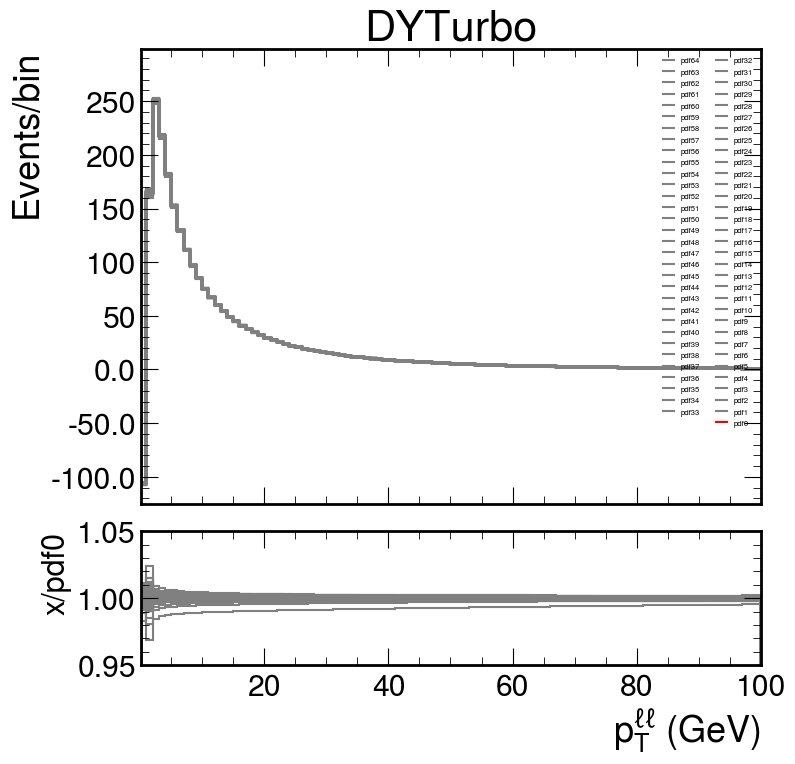

In [107]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                dyturboZ_pdf[{"vars" : x}].project("qT") for x in dyturboZ_pdf.axes["vars"]
            ],
            labels=list(dyturbo_scetlib_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(dyturbo_scetlib_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$p_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("DYTurbo")

In [70]:
scetlibZ_pdf = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_NP0_combined.pkl")

In [71]:
scetlibZ_nnlo_sing_pdf = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_NP0_nnlo_sing_combined.pkl")

In [82]:
dyturbo_pt_temp = scetlibZ_nnlo_sing_pdf.project("qT", "vars")
dyturbo_pt_temp[...] = dyturboZ_pdf.project("qT", "vars").view(flow=True)

Text(0.5, 1.0, 'Central pdf')

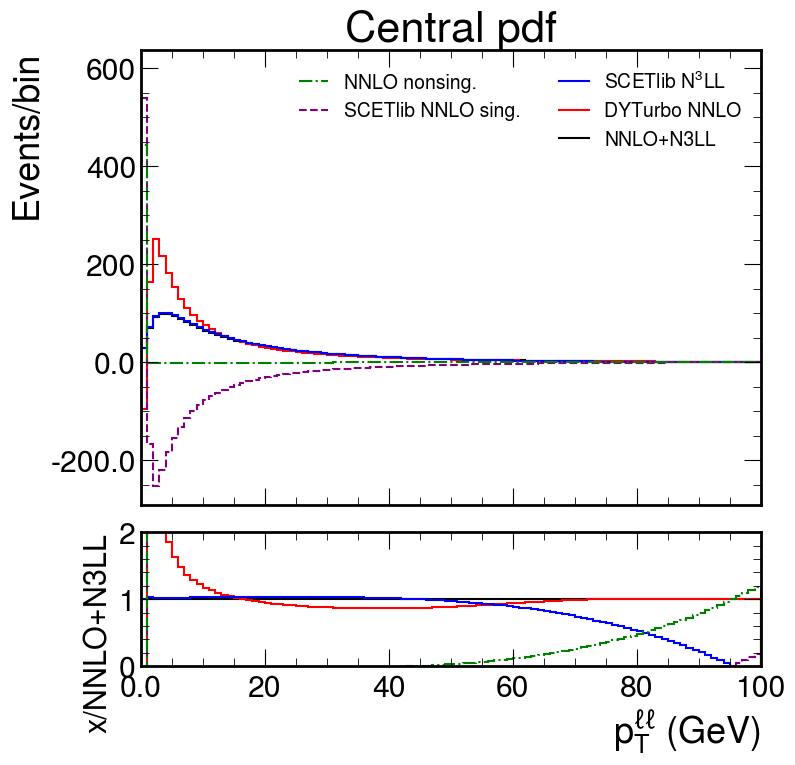

In [100]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                dyturbo_scetlib_pdf[{"vars" : "pdf0"}].project("qT"),
                dyturbo_pt_temp[{"vars" : "pdf0"}].project("qT"),
                scetlibZ_pdf[{"vars" : "pdf0"}].project("qT"),
                -1*scetlibZ_nnlo_sing_pdf[{"vars" : "pdf0"}].project("qT"),
                dyturbo_pt_temp[{"vars" : "pdf0"}].project("qT")+-1*scetlibZ_nnlo_sing_pdf[{"vars" : "pdf0"}].project("qT")
            ],
            labels=["NNLO+N3LL", "DYTurbo NNLO", "SCETlib N$^{3}LL$", "SCETlib NNLO sing.", "NNLO nonsing."],
            colors=["black", "red", "blue", "purple", "green"],
            linestyles=["solid", "solid", "solid", "dashed", "dashdot", ],
            xlabel=r"$p_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/NNLO+N3LL",
            legtext_size=20,
            rrange=[0.0,2],
            yscale=1.1,
)
fig.get_axes()[0].set_title("Central pdf")

Text(0.5, 1.0, 'pdf1')

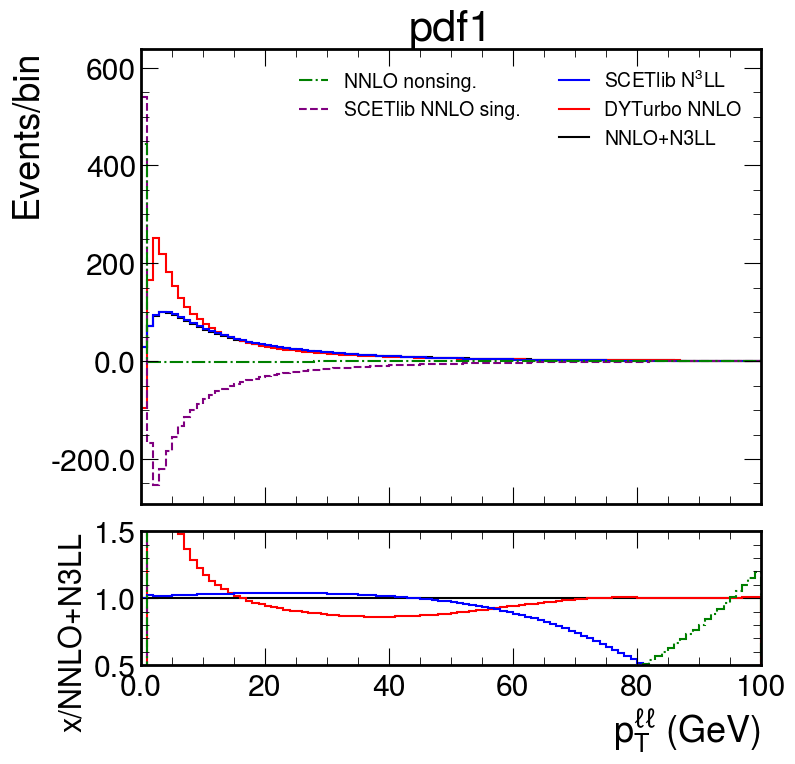

In [95]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                dyturbo_scetlib_pdf[{"vars" : "pdf1"}].project("qT"),
                dyturbo_pt_temp[{"vars" : "pdf1"}].project("qT"),
                scetlibZ_pdf[{"vars" : "pdf1"}].project("qT"),
                -1*scetlibZ_nnlo_sing_pdf[{"vars" : "pdf1"}].project("qT"),
                dyturbo_pt_temp[{"vars" : "pdf1"}].project("qT")+-1*scetlibZ_nnlo_sing_pdf[{"vars" : "pdf1"}].project("qT")
            ],
            labels=["NNLO+N3LL", "DYTurbo NNLO", "SCETlib N$^{3}LL$", "SCETlib NNLO sing.", "NNLO nonsing."],
            colors=["black", "red", "blue", "purple", "green"],
            linestyles=["solid", "solid", "solid", "dashed", "dashdot", ],
            xlabel=r"$p_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/NNLO+N3LL",
            legtext_size=20,
            rrange=[0.5, 1.5],
            yscale=1.1,
)
fig.get_axes()[0].set_title("pdf1")

Text(0.5, 1.0, 'SCETlib NNLO sing.')

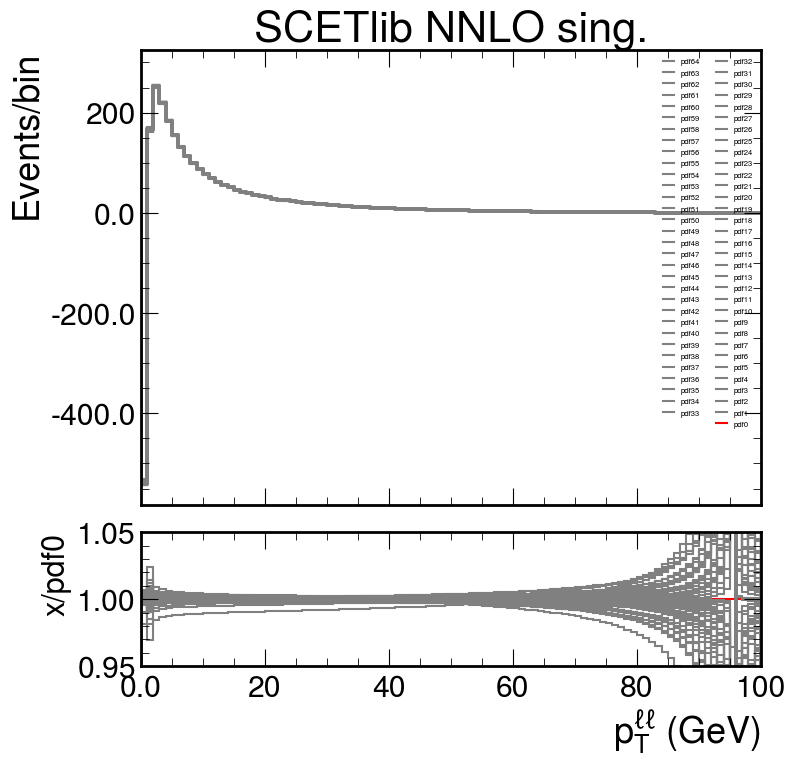

In [161]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                scetlibZ_nnlo_sing_pdf[{"vars" : x}].project("qT") for x in scetlibZ_nnlo_sing_pdf.axes["vars"]
            ],
            labels=list(scetlibZ_nnlo_sing_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(scetlibZ_nnlo_sing_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$p_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("SCETlib NNLO sing.")

In [135]:
print(scetlibZ_nnlo_sing_pdf[{"vars" : "pdf0"}].project("qT")[99.j])
print(scetlibZ_pdf[{"vars" : "pdf0"}].project("qT")[99.j])
print(dyturbo_pt_temp[{"vars" : "pdf0"}].project("qT")[99.j])
print(dyturbo_scetlib_pdf[{"vars" : "pdf0"}].project("qT")[99.j])

WeightedSum(value=-0.158189, variance=4.08448e-11)
WeightedSum(value=-0.158216, variance=3.2781e-11)
WeightedSum(value=0.851515, variance=1.16189e-08)
WeightedSum(value=0.851487, variance=1.16926e-08)


In [138]:
pdf="pdf12"
print(scetlibZ_nnlo_sing_pdf[{"vars" : pdf}].project("qT")[99.j])
print(scetlibZ_pdf[{"vars" : pdf}].project("qT")[99.j])
print(dyturbo_pt_temp[{"vars" : pdf}].project("qT")[99.j])
print(dyturbo_scetlib_pdf[{"vars" : pdf}].project("qT")[99.j])

WeightedSum(value=-0.171817, variance=4.33687e-11)
WeightedSum(value=-0.171845, variance=3.36125e-11)
WeightedSum(value=0.853031, variance=1.16324e-08)
WeightedSum(value=0.837858, variance=1.16934e-08)


In [139]:
dyturbo_scetlib_nons_pdf = input_tools.read_matched_scetlib_dyturbo_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_NP0_combined.pkl",
    "/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_NP0_nnlo_sing_combined.pkl",
    "/scratch/shared/TheoryPredictions/DYTurbo/Z/msht20nnlo/pdfvars/results_z-2d-nnlo-vj-member{i}-scetlibmatch.txt",
    axes=("Y", "qT"),
    charge=0,
)

Hist(
  Variable(array([-5.  , -4.  , -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
       -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,
        0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  4.  ,  5.  ]), name='Y'),
  Regular(100, 0, 100, name='qT'),
  Regular(1, 0, 1, underflow=False, overflow=False, name='charge'),
  StrCategory(['pdf0', 'pdf1', 'pdf2', 'pdf3', 'pdf4', 'pdf5', 'pdf6', 'pdf7', 'pdf8', 'pdf9', 'pdf10', 'pdf11', 'pdf12', 'pdf13', 'pdf14', 'pdf15', 'pdf16', 'pdf17', 'pdf18', 'pdf19', 'pdf20', 'pdf21', 'pdf22', 'pdf23', 'pdf24', 'pdf25', 'pdf26', 'pdf27', 'pdf28', 'pdf29', 'pdf30', 'pdf31', 'pdf32', 'pdf33', 'pdf34', 'pdf35', 'pdf36', 'pdf37', 'pdf38', 'pdf39', 'pdf40', 'pdf41', 'pdf42', 'pdf43', 'pdf44', 'pdf45', 'pdf46', 'pdf47', 'pdf48', 'pdf49', 'pdf50', 'pdf51', 'pdf52', 'pdf53', 'pdf54', 'pdf55', 'pdf56', 'pdf57', 'pdf58', 'pdf59', 'pdf60', 'pdf61', 'pdf62', 'pdf63', 'pdf64'], name='vars'),
  s

In [145]:
scetlibZ_pdf[{"vars" : "pdf0"}].project("qT").values()

array([ 2.87533633e+01,  7.25987267e+01,  9.42203598e+01,  1.01218472e+02,
        1.00331579e+02,  9.57841659e+01,  8.98230877e+01,  8.35315956e+01,
        7.73677082e+01,  7.15360309e+01,  6.61462260e+01,  6.12089977e+01,
        5.67168651e+01,  5.26487022e+01,  4.89346001e+01,  4.55480379e+01,
        4.24558562e+01,  3.96466641e+01,  3.70626355e+01,  3.46807162e+01,
        3.24869701e+01,  3.04641098e+01,  2.86020392e+01,  2.68818728e+01,
        2.52884369e+01,  2.38106548e+01,  2.24379998e+01,  2.11564110e+01,
        1.99487263e+01,  1.88416135e+01,  1.78067163e+01,  1.68497296e+01,
        1.59529079e+01,  1.50887662e+01,  1.42852466e+01,  1.35249366e+01,
        1.28076838e+01,  1.21305882e+01,  1.14904696e+01,  1.08835771e+01,
        1.03085680e+01,  9.76486863e+00,  9.24983682e+00,  8.76077086e+00,
        8.29649366e+00,  7.85626298e+00,  7.43823987e+00,  7.04023623e+00,
        6.66100642e+00,  6.30033457e+00,  5.95735515e+00,  5.63106246e+00,
        5.32042848e+00,  

In [169]:
dyturbo_scetlib_msht20an3lo = input_tools.read_matched_scetlib_dyturbo_hist(
    "/home/k/kelong/TheoryCorrections/SCETlib/Z/msht20an3lo/inclusive_Z_MSHT20an3lo_NP0_N3LL_combined.pkl",
    "/home/k/kelong/TheoryCorrections/SCETlib/Z/msht20an3lo/inclusive_Z_MSHT20an3lo_NP0_nnlo_sing_combined.pkl",
    "/home/k/kelong/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/pdfvariations/msht20an3lo/z0/results_z-2d-nnlo-vj-msht20an3lo-member{i}-scetlibmatch.txt",
    axes=("Y", "qT"),
    charge=0,
)

Text(0.5, 1.0, 'DYTurbo+SCETlib (MSHT20aN3LO)')

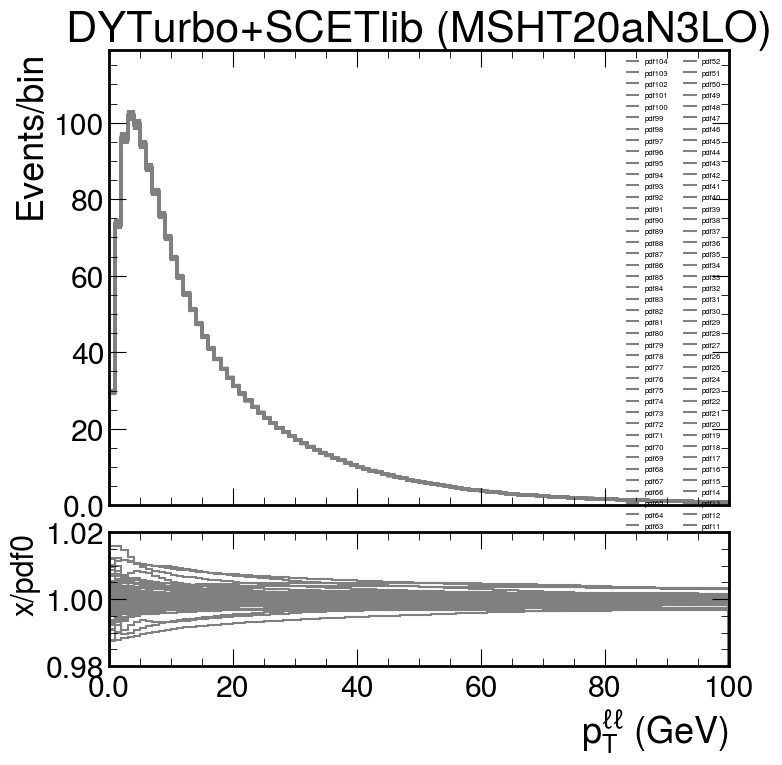

In [173]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                dyturbo_scetlib_msht20an3lo[{"vars" : x}].project("qT") for x in dyturbo_scetlib_msht20an3lo.axes["vars"]
            ],
            labels=list(dyturbo_scetlib_msht20an3lo.axes["vars"]),
            colors=["red"]+(["grey"]*len(dyturbo_scetlib_msht20an3lo.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$p_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.98, 1.02],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("DYTurbo+SCETlib (MSHT20aN3LO)")

Text(0.5, 1.0, 'DYTurbo+SCETlib (MSHT20aN3LO)')

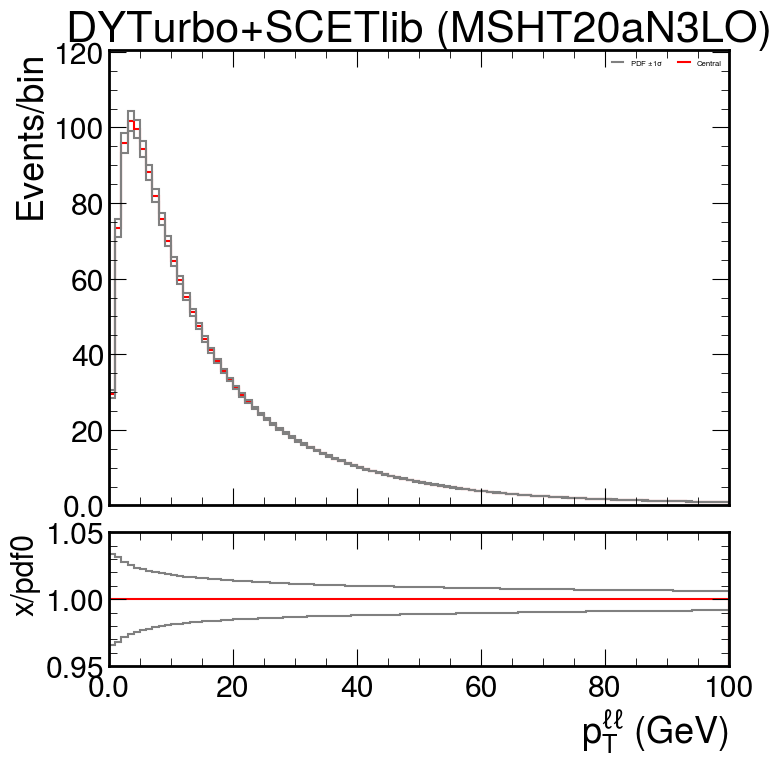

In [175]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                dyturbo_scetlib_msht20an3lo[{"vars" : "pdf0"}].project("qT"),
                *theory_tools.hessianPdfUnc(dyturbo_scetlib_msht20an3lo.project("qT", "vars"), "vars", uncType="asymHessian"),
            ],
            labels=["Central", "PDF $\pm 1\sigma$", ""],
            colors=["red"]+["grey"]*2, 
            xlabel=r"$p_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("DYTurbo+SCETlib (MSHT20aN3LO)")

In [180]:
dyturbo_scetlib_tnp = input_tools.read_matched_scetlib_dyturbo_hist(
    "/home/k/kelong/TheoryCorrections/SCETlib/Z/msht20nnlo/inclusive_Z_MSHT20_NP0_vars_combined.pkl",
    "/home/k/kelong/TheoryCorrections/SCETlib/Z/msht20nnlo/inclusive_Z_MSHT20_NP0_nnlo_sing_combined.pkl",
    "/home/k/kelong/TheoryCorrections/DYTURBO/nnlo-scetlibmatch/pdfvariations/msht20nnlo/z0/results_z-2d-nnlo-vj-member0-scetlibmatch.txt.txt",
    axes=("Y", "qT"),
    charge=0,
)

(32, 100, 1)
(32, 100, 1, 65)


Text(0.5, 1.0, 'DYTurbo+SCETlib')

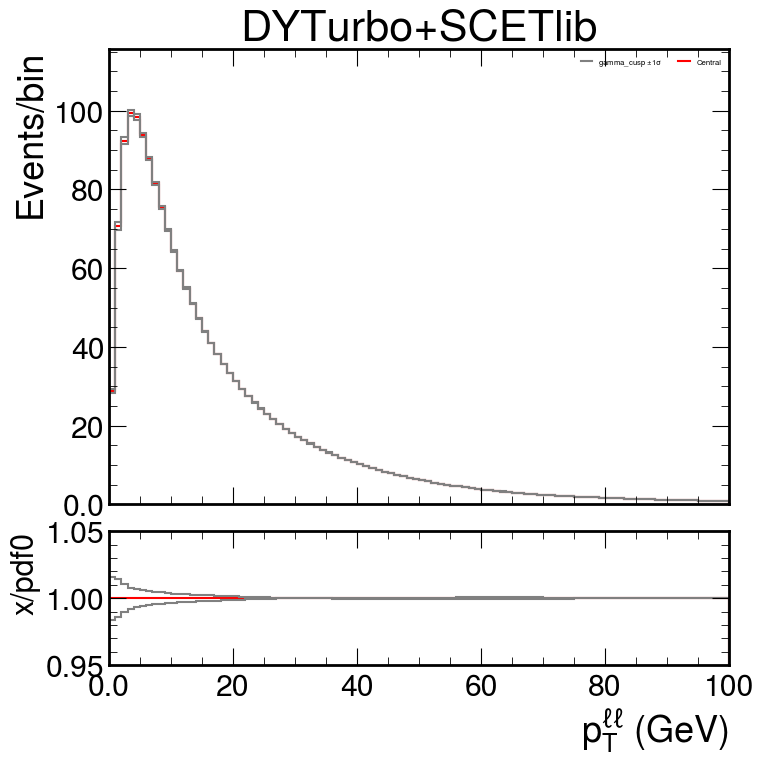

In [184]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                dyturbo_scetlib_tnp[{"vars" : "pdf0"}].project("qT"),
                dyturbo_scetlib_tnp[{"vars" : "b_qqV+1"}].project("qT"),
                dyturbo_scetlib_tnp[{"vars" : "b_qqV-1"}].project("qT"),
            ],
            labels=["Central", "gamma_cusp $\pm 1\sigma$", ""],
            colors=["red"]+["grey"]*2, 
            xlabel=r"$p_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("DYTurbo+SCETlib")